In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [3]:
df_original = pd.read_csv("C:/Users/E7440/OneDrive/Desktop/ML _Project_work/ML_projects/datasets/churn_modelling.csv")
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check class balance
df_original['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
# Calculate average balance of customers who churned
avg_churned_bal = df_original[df_original['Exited']==1]['Balance'].mean()
avg_churned_bal

91108.53933726068

In [6]:
# Create a new df that drops RowNumber, CustomerId, Surname, and Gender cols
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], 
                            axis=1)

In [9]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True).astype(int)

In [10]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1


Split the data

In [11]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=42)

# Baseline model

In [12]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [13]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.790
Precision: 0.486
Recall: 0.503
F1 Score: 0.494


# Analysis of baseline model
#### Confusion matrix

Let's inspect the confusion matrix of our decision tree's predictions. First, we'll write a short helper function to help us display the matrix.

In [14]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

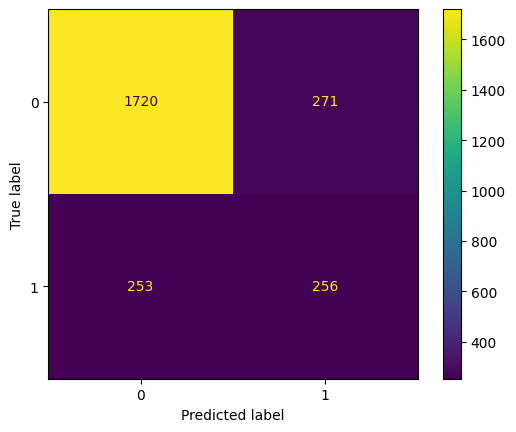

In [15]:
# Generate confusion matrix
conf_matrix_plot(decision_tree, X_test, y_test)

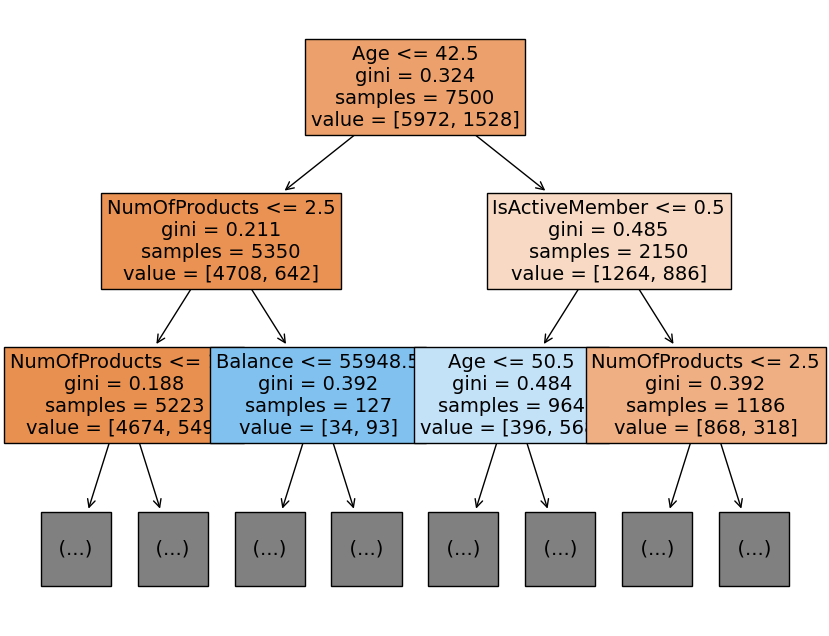

In [28]:
# Plot the tree
# Plot the tree
plt.figure(figsize=(10,8))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns.tolist(), 
          class_names=None, filled=True)
plt.show()

## Tune and validatiom decision trees with python


In [29]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

#cross validation hyperparameter tuning
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [33]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [34]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

In [35]:
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

# Fit the model
clf.fit(X_train, y_train)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'top_k_accuracy', 'f1_samples', 'neg_mean_squared_log_error', 'jaccard_samples', 'precision_samples', 'roc_auc', 'r2', 'homogeneity_score', 'recall_samples', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'recall_weighted', 'explained_variance', 'neg_mean_gamma_deviance', 'f1_macro', 'jaccard_macro', 'precision_micro', 'roc_auc_ovo', 'fowlkes_mallows_score', 'recall_macro', 'recall_micro', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'f1_weighted', 'jaccard_weighted', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'roc_auc_ovo_weighted', 'completeness_score', 'precision', 'accuracy', 'balanced_accuracy', 'neg_median_absolute_error', 'precision_macro', 'roc_auc_ovr_weighted', 'max_error', 'jaccard', 'neg_log_loss', 'jaccard_micro', 'rand_score', 'f1_micro', 'average_precision', 'roc_auc_ovr', 'f1', 'neg_brier_score', 'v_measure_score', 'neg_mean_absolute_error', 'adjusted_mutual_info_score', 'neg_negative_likelihood_ratio', 'precision_weighted', 'matthews_corrcoef', 'adjusted_rand_score', 'mutual_info_score', 'recall'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got {'accuracy', 'f1', 'precision', 'recall'} instead.

In [36]:
clf.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [37]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [38]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [39]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [40]:
# Save results table as csv
result_table.to_csv("Results.csv")

NameError: name 'result_table' is not defined

In [41]:
# View the results
result_table

NameError: name 'result_table' is not defined